# Analysing precipitation timeseries with PANDAS

Analisando série temporal de precipitação com PANDAS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pylab as pl
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from os import environ
environ['MPLBACKEND'] = 'module://gr.matplotlib.backend_gr'

## Read dataframe

In [37]:
df=pd.read_pickle('dataframe.pickle.gz')

In [38]:
df[df.Rg_mm_10<-100].head()

,,r_km,Theta,height_km,lat,lon,Z_dbZ,Zdr_dbZr,Kdp_o_km,Vr_m_s,Rhv,rz,rkdp,dado,Rg_mm_10,rain_merge,Rspol,SPOL_merge
estacao_codigo,datetime,,,,,,,,,,,,,,,,,


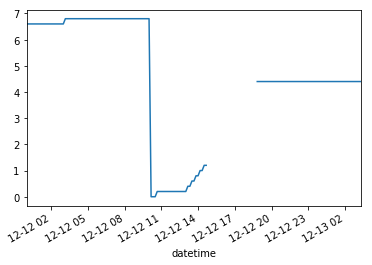

In [40]:
st6=df.loc[6,:]
st6.loc['20161212':'20161213'].dado.plot()

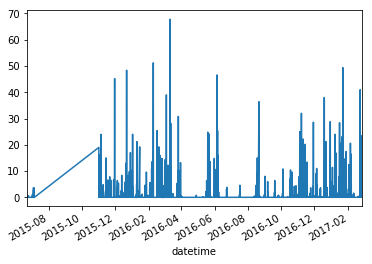

In [125]:
st6[st6.rain_merge=='right_only'].Rg_mm_10.plot()

## Grouping data by station (using station code: 2nd columm of dataframe table)

Group data by stations
station_grouped=df.reset_index(level=0).groupby('estacao_codigo')

## Let's resample the data only for R(Z-R) Rgauges and Raw gauges

#station_2min=station_grouped.resample('2T',label='left').agg({'r_km': np.min, 'dado': np.sum,'Rg_mm_10min': np.sum, 'rz': np.sum, 'Rspol': np.sum, 'rkdp': np.sum})

station_10min=station_grouped.resample('10T',label='left').agg({'r_km': np.min, 'dado': np.sum,'Rg_mm_10min': np.sum, 'rz': np.sum, 'Rspol': np.sum, 'rkdp': np.sum})

station_1h=station_grouped.resample('1H',label='left').agg({'r_km': np.min, 'dado': np.sum,'Rg_mm_10min': np.sum, 'rz': np.sum, 'Rspol': np.sum, 'rkdp': np.sum})

station_1d=station_grouped.resample('1D',label='left').agg({'r_km': np.min, 'dado': np.sum,'Rg_mm_10min': np.sum, 'rz': np.sum, 'Rspol': np.sum, 'rkdp': np.sum})


In [3]:
station_1h=pd.read_pickle('st1h.pkl.gz')

In [4]:
station_1d=pd.read_pickle('st1d.pkl.gz')

In [7]:
station_1d=station_1d.assign(gr_kdp=station_1d.Rg_mm_10/station_1d.rkdp)
station_1d=station_1d.assign(gr_spol=station_1d.Rg_mm_10/station_1d.Rspol)

In [6]:
station_1h=station_1h.assign(gr_kdp=station_1h.Rg_mm_10/station_1h.rkdp)
station_1h=station_1h.assign(gr_spol=station_1h.Rg_mm_10/station_1h.Rspol)

In [33]:
n=station_1h[(station_1h.Rg_mm_10>0.2) & (station_1h.rkdp>0.2)].Rg_mm_10.count()
soma=((station_1h[(station_1h.Rg_mm_10>0.2) &
           (station_1h.rkdp>0.2)].Rg_mm_10-station_1h[(station_1h.Rg_mm_10>0.2) &
                                                    (station_1h.rkdp>0.2)].rkdp)**2).sum()
rmse_1h_kdp=np.sqrt(soma/(n-1))
print('1h KDP-R: RMSE = '+str(rmse_1h_kdp))

1h KDP-R: RMSE = 6.31698430547


In [34]:
n=station_1d[(station_1d.Rg_mm_10>0.2) & (station_1d.rkdp>0.2)].Rg_mm_10.count()
soma=((station_1d[(station_1d.Rg_mm_10>0.2) &
           (station_1d.rkdp>0.2)].Rg_mm_10-station_1d[(station_1d.Rg_mm_10>0.2) &
                                                    (station_1d.rkdp>0.2)].rkdp)**2).sum()
rmse_1d_kdp=np.sqrt(soma/(n-1))
print('1d KDP-R: RMSE = '+str(rmse_1d_kdp))

1d KDP-R: RMSE = 23.235648436


In [35]:
n=station_1h[(station_1h.Rg_mm_10>0.2) & (station_1h.rz>0.2)].Rg_mm_10.count()
soma=((station_1h[(station_1h.Rg_mm_10>0.2) &
           (station_1h.rz>0.2)].Rg_mm_10-station_1h[(station_1h.Rg_mm_10>0.2) &
                                                    (station_1h.rkdp>0.2)].rkdp)**2).sum()
rmse_1h_z=np.sqrt(soma/(n-1))
print('1h Z-R: RMSE = '+str(rmse_1h_z))

1h Z-R: RMSE = 5.55802856958


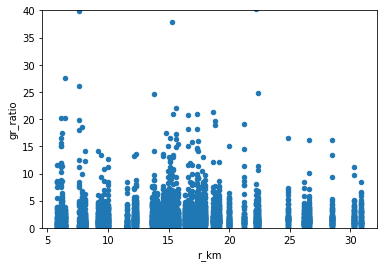

In [89]:
station_1h[(station_1h.Rg_mm_10>0.2) & (station_1h.rz>0.2)].plot.scatter(y='gr_kdp',x='r_km',ylim=(0,40))

In [101]:
station_1h[(station_1h.Rg_mm_10>0.2) & (station_1h.Rspol>0.2)].head()#plot.scatter(y='gr_ratio_spol',x='r_km')

dado  Rg_mm_10  rkdp  rz  r_km      Rspol  \
estacao_codigo datetime                                                         
5              2015-07-01 23:00:00   4.4       0.6   NaN NaN   NaN   1.557685   
               2015-07-03 10:00:00  17.8      17.6   NaN NaN   NaN   7.700529   
               2015-07-03 11:00:00   2.6       0.4   NaN NaN   NaN   5.566446   
               2015-07-03 13:00:00   7.2       1.0   NaN NaN   NaN  24.772491   
               2015-07-03 14:00:00  23.0       4.8   NaN NaN   NaN  45.333246   

                                    gr_ratio  gr_ratio_spol  
estacao_codigo datetime                                      
5              2015-07-01 23:00:00       NaN       0.385187  
               2015-07-03 10:00:00       NaN       2.285557  
               2015-07-03 11:00:00       NaN       0.071859  
               2015-07-03 13:00:00       NaN       0.040367  
               2015-07-03 14:00:00       NaN       0.105883

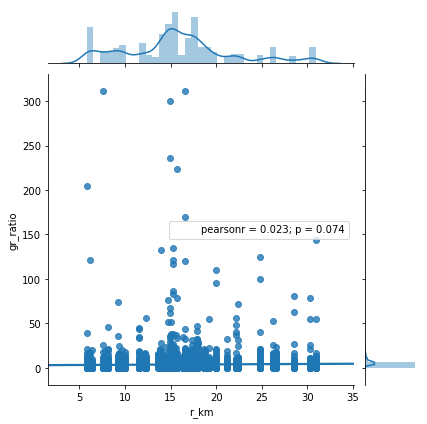

In [128]:
sns.jointplot(x='r_km',y='gr_kdp',data=station_1h[(station_1h.Rg_mm_10>0.2) & (station_1h.rkdp>0.2)],kind='reg')

station_2min.plot.scatter(x='Rg_mm_10min',y='rz',title='2min Z-R')

station_2min.plot.scatter(x='Rg_mm_10min',y='rkdp',title='2min Z-KDP')

station_10min.plot.scatter(x='Rg_mm_10min',y='rz',title='10min Z-R')

station_10min.plot.scatter(x='Rg_mm_10min',y='rkdp',title='10min Z-KDP')

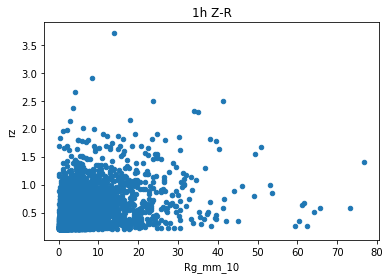

In [12]:
station_1h[(station_1h.Rg_mm_10>0.2) & (station_1h.rz>0.2)].plot.scatter(x='Rg_mm_10',y='rz',title='1h Z-R')

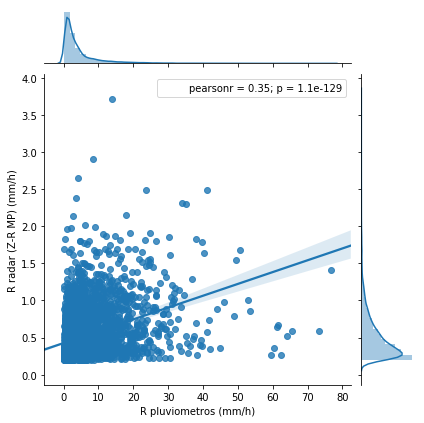

In [26]:
p=(sns.jointplot(x='Rg_mm_10',y='rz',data=station_1h[(station_1h.Rg_mm_10>0.2) & (station_1h.rz>0.2)],kind='reg')).set_axis_labels("R pluviometros (mm/h)", "R radar (Z-R MP) (mm/h)")

In [77]:
fit=np.polyfit(station_1h[(station_1h.Rg_mm_10>0.2) & (station_1h.rz>0.2)].Rg_mm_10,
               station_1h[(station_1h.Rg_mm_10>0.2) & (station_1h.rz>0.2)].rz,deg=1)
print('y = '+str(fit[0])+' x'+' + '+str(fit[1]))

y = 0.0159253574371 x + 0.426532161168


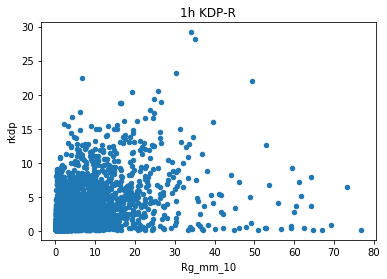

In [55]:
station_1h[(station_1h.Rg_mm_10>0.2) & (station_1h.rkdp>0.2)].plot.scatter(x='Rg_mm_10',y='rkdp',title='1h KDP-R')

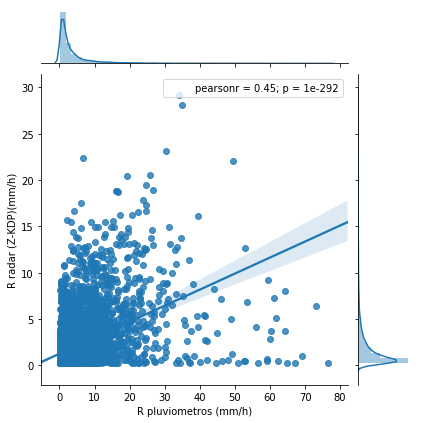

In [28]:
sns.jointplot(x='Rg_mm_10',y='rkdp',data=station_1h[(station_1h.Rg_mm_10>0.2) & (station_1h.rkdp>0.2)],kind='reg').set_axis_labels("R pluviometros (mm/h)", "R radar (Z-KDP)(mm/h)")

In [79]:
fit=np.polyfit(station_1h[(station_1h.Rg_mm_10>0.2) & (station_1h.rkdp>0.2)].Rg_mm_10,
               station_1h[(station_1h.Rg_mm_10>0.2) & (station_1h.rkdp>0.2)].rkdp,deg=1)
print('y = '+str(fit[0])+' x'+' + '+str(fit[1]))

y = 0.173041268141 x + 1.24955671705


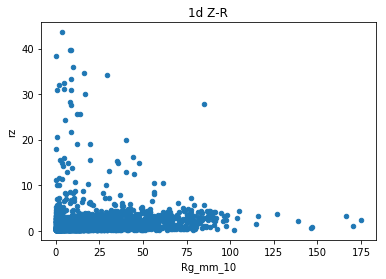

In [48]:
station_1d[(station_1d.Rg_mm_10>0.2) & (station_1d.rz>0.2)].plot.scatter(x='Rg_mm_10',y='rz',title='1d Z-R')

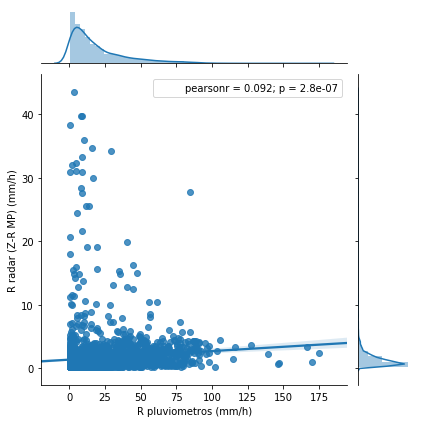

In [27]:
p2=(sns.jointplot(x='Rg_mm_10',y='rz',data=station_1d[(station_1d.Rg_mm_10>0.2) & (station_1d.rz>0.2)],kind='reg')).set_axis_labels("R pluviometros (mm/h)", "R radar (Z-R MP) (mm/h)")

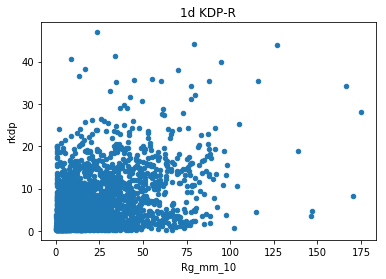

In [56]:
station_1d[(station_1d.Rg_mm_10>0.2) & (station_1d.rkdp>0.2)].plot.scatter(x='Rg_mm_10',y='rkdp',title='1d KDP-R')

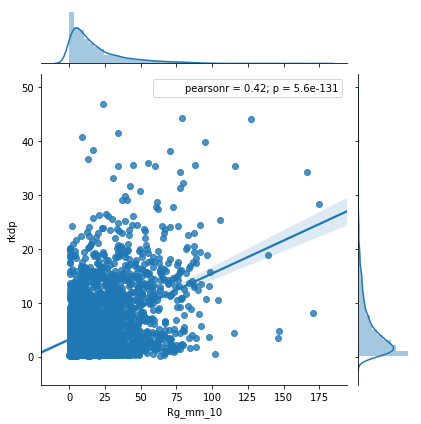

In [57]:
sns.jointplot(x='Rg_mm_10',y='rkdp',data=station_1d[(station_1d.Rg_mm_10>0.2) & (station_1d.rkdp>0.2)],kind='reg')

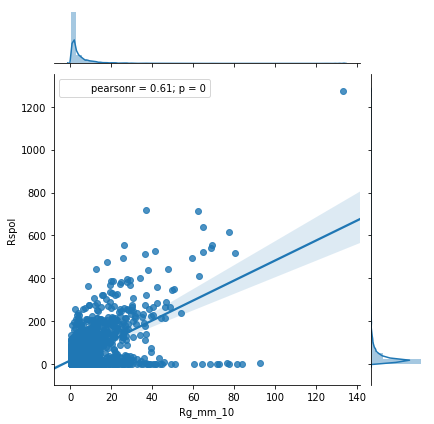

In [30]:
sns.jointplot(x='Rg_mm_10',y='Rspol',data=station_1h[(station_1h.Rg_mm_10>0.2) & (station_1h.Rspol>0.2)],kind='reg')

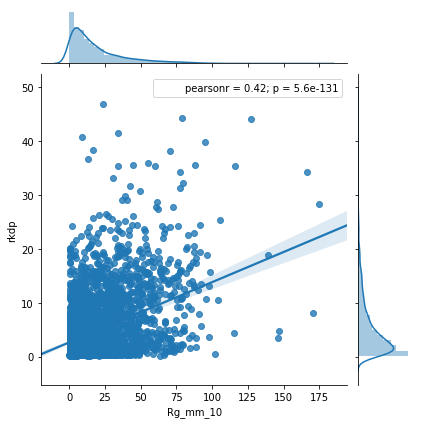

In [38]:
sns.jointplot(x='Rg_mm_10',y='rkdp',data=station_1d[(station_1d.Rg_mm_10>0.2) & (station_1d.rkdp>0.2)],kind='reg',robust=True)

In [45]:
fit=np.polyfit(station_1d[(station_1d.Rg_mm_10>0.2) & (station_1d.rkdp>0.2)].Rg_mm_10,
               station_1d[(station_1d.Rg_mm_10>0.2) & (station_1d.rkdp>0.2)].rkdp,deg=1)
fit

array([ 0.12242143,  3.17475026])

In [68]:
fit=np.polyfit(station_1d[(station_1d.Rg_mm_10>0.2) & (station_1d.rkdp>0.2)].Rg_mm_10,
               station_1d[(station_1d.Rg_mm_10>0.2) & (station_1d.rkdp>0.2)].rkdp,deg=1)
print('y = '+str(fit[0])+' x'+' + '+str(fit[1]))

y = 0.122421425146 x + 3.17475026371


In [ ]:
df[df.rain_merge!='left_only'].loc[6,:].dado.head()

station_1h.plot.scatter(x='Rg_mm_10min',y='Rspol')

station_1d.plot.scatter(x='Rg_mm_10min',y='Rspol')

station_1d.plot.scatter(x='rz',y='Rspol')

## Contingency Tables for rainfall gauges vs rainfall radar

In [ ]:
#pd.crosstab(station_2min.Rg_mm_10min>=0,station_2min.rz>=0)

In [ ]:
#pd.crosstab(station_10min.Rg_mm_10min>=0,station_10min.rz>=0)

In [76]:
station_1d.corr()

,dado,Rg_mm_10,rkdp,rz,r_km,Rspol
dado,1.000000,0.811170,0.418255,0.150312,-0.002853,0.612001
Rg_mm_10,0.811170,1.000000,0.452425,0.160229,0.007681,0.630423
rkdp,0.418255,0.452425,1.000000,0.351400,0.067706,NaN
rz,0.150312,0.160229,0.351400,1.000000,-0.104793,NaN
r_km,-0.002853,0.007681,0.067706,-0.104793,1.000000,NaN
Rspol,0.612001,0.630423,NaN,NaN,NaN,1.000000


In [69]:
pd.crosstab(station_1h.Rg_mm_10>=0.2,station_1h.rz>=0.2)

rz,False,True
Rg_mm_10,,
False,2315843,12463
True,44177,4534


In [70]:
pd.crosstab(station_1d.Rg_mm_10>=0.2,station_1d.rz>=0.2)

rz,False,True
Rg_mm_10,,
False,78726,5646
True,11565,3195


In [71]:
pd.crosstab(station_1h.Rg_mm_10>=0.2,station_1h.Rspol>=0.2)

Rspol,False,True
Rg_mm_10,,
False,2214520,113786
True,43120,5591


In [72]:
pd.crosstab(station_1h.rz>=0.2,station_1h.Rspol>=0.2)

Rspol,False,True
rz,,
False,2240643,119377
True,16997,0


In [12]:
sns.jointplot?